### 횡스크롤 슈팅 게임 만들기의 단계!

1. 맵 만들기(맵 움직이기)
2. 조작 캐릭터 생성해서 움직이기
3. 적 캐릭터 생성해서 움직이게 하기
* 3-1 일반 적 캐릭터
* 3-2 보스 적 캐릭터
4. 캐릭터 애니메이션 넣기
5. 충돌 판정(적과의 충돌, 공격과의 충돌)
6. 점수 부여하기
7. 배경음악 넣기
8. 스테이지 클리어 조건 부여하기


#### 1. 맵 만들기(맵 움직이기)

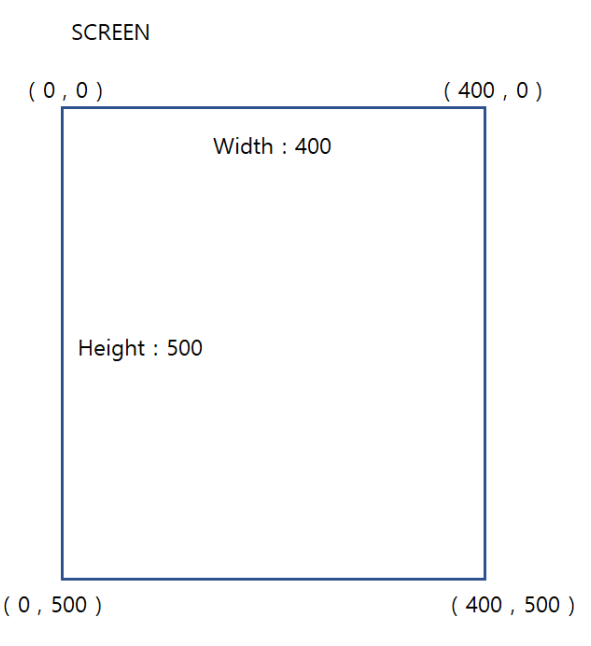

In [ ]:
#in game.py

import pygame

pygame.init()

#전역변수 -> 프로그램 모든 부분에서 접근이 가능한 변수(값을 저장하는 이름)
#하나의 함수에서 전역변수를 사용하기 위해서는 별도 키워드 global을 써주거나 함수의 입력값으로 전달해야 한다

screen = pygame.display.set_mode((,))
pygame.display.set_caption("")
fps = pygame.time.Clock()

#class란?
#객체지향 프로그래밍에 나온 개념
#프로그래밍에 필요한 것들을 객체로 묶고 필요한 값들과 기능(함수)들을 묶어놓은 기능

class Background:
    def __init__(self,screen): #초기화
        self.screen = screen
        self.background = pygame.image.load("game_background(800_600).jpg")
        self.x1 =
        self.x2 =
    def blit(self): #그려주기
        self.screen.blit(self.background,(self.x1,0))
        self.screen.blit(self.background,(self.x2,0))
    def update(self): #화면 업데이트
        self.x1-=3
        self.x2-=3
        if self.x1 <=-800:
            self.x1 = 800
        if self.x2 <= -800:
            self.x2 = 800

### main() 함수는 모든 프로그램에 존재하지만 별도로 설정해줄 수도 있다.
def main():
    bg = Background(screen)
    while True:

        for event in pygame.event.get():
            if event.type == pygame.KEY():
                if event.key == pygame.K_q:
                    pygame.quit()

        bg.blit()
        bg.update()
        pygame.display.update()
        fps.tick(60)

#main() 함수를 불러와서 실행하는 부분
main()




#### 2. 조작 캐릭터 생성해서 움직이기

In [ ]:
#class Background 밑에 추가하기

import pygame

pygame.init()

screen = pygame.display.set_mode((800,600))
pygame.display.set_caption("Hello_My_Game")
fps = pygame.time.Clock()

class Background:
    def __init__(self,screen):
        self.screen = screen
        self.background = pygame.image.load("game_background(800_600).jpg")
        self.x1 = 0
        self.x2 = 800
    def blit(self):
        self.screen.blit(self.background,(self.x1,0))
        self.screen.blit(self.background,(self.x2,0))
    def update(self):
        self.x1-=3
        self.x2-=3
        if self.x1 <=-800:
            self.x1 = 800
        if self.x2 <= -800:
            self.x2 = 800

class Character:
    def __init__(self,screen):
        self.screen = screen
        self.player = pygame.image.load("")
        self.x1 = 0
        self.y1 = 0
        self.move_right = False
        self.move_left = False

    def blit(self):
        self.screen.blit(self.player,(self.x1,self.y1))
    def update(self):
        if self.move_right:
            self.x1 +=2

def main():
    bg = Background(screen)
    #pl = Character(screen)
    while True:

        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    pygame.quit()
                if event.key == pygame.K_RIGHT:
                    pl.move_right = True

        bg.blit()
        bg.update()
        #pl.blit()
        #pl.update()
        pygame.display.update()
        fps.tick(60)

main()

#이 코드를 어떻게 수정해야 일반적인 게임의 규칙을 만들 수 있을까?
#플레이어를 어떻게 멈춰야 할까?
#상하좌우 방향키를 어떻게 반영해야 할까?


In [ ]:
#위 코드에 필요한 내용을 추가하여 (필요하면 속도도 조절해서) 맵에서 캐릭터를 자유롭게 움직일 수 있는 프로그램으로 완성하시오



####3. 적 캐릭터 생성해서 움직이게 하기
* 3-1 일반 적 캐릭터

In [ ]:
#enemy.py를 만들어서 따로 저장한 후 코드 복붙해서 완성하기

import pygame
import random

class Enemy:
    #적의 이미지 크기는 90X90
    def __init__(self,screen):
        self.screen = screen
        self.image = [pygame.image.load(""),
                      pygame.image.load(""),
                      pygame.image.load("")]
        self.enemy_x = 800 #화면 오른쪽 끝에서
        self.enemy_y = random.randrange(0,)

        self.isDead = False

    def blit(self):
        if not self.isDead:
            self.screen.blit(self.image[random.randint(,)],(,))

    def update(self):
        self.enemy_x -=3

        if self.enemy_x <-100:
            self.enemy_x = 800
            self.enemy_y = random.randrange(0,500)

        if self.isDead:
            self.enemy_x = 800
            self.enemy_y = self.enemy_y = random.randrange(0,500)
            self.isDead = False


In [ ]:
#game.py에 다음 부분 추가하기

#적 객체를 생성하는 부분
en = enemy.Enemy(screen)

#적 객체를 화면에 그리고 업데이트 하는 부분

en.blit()
en.update())

In [ ]:
#in game.py

import pygame
import enemy

pygame.init()

screen = pygame.display.set_mode((800,600))
pygame.display.set_caption("Hello_My_Game")
fps = pygame.time.Clock()

class Background:
    def __init__(self,screen):
        self.screen = screen
        self.background = pygame.image.load("game_background(800_600).jpg")
        self.x1 = 0
        self.x2 = 800
    def blit(self):
        self.screen.blit(self.background,(self.x1,0))
        self.screen.blit(self.background,(self.x2,0))
    def update(self):
        self.x1-=3
        self.x2-=3
        if self.x1 <=-800:
            self.x1 = 800
        if self.x2 <= -800:#d
            self.x2 = 800

class Character:
    def __init__(self,screen):
        self.screen = screen
        self.player = pygame.image.load("resource\standing\play_atti_standing_0.png")
        self.x1 = 0
        self.y1 = 0
        self.move_right = False
        self.move_left = False
        self.move_up = False
        self.move_down = False


    def blit(self):
        self.screen.blit(self.player,(self.x1,self.y1))
    def update(self):
        if self.move_right:
            self.x1 +=2
        if self.move_left:
            self.x1 -=2
        if self.move_up:
            self.y1 -=2
        if self.move_down:
            self.y1 +=2


def main():
    bg = Background(screen)
    pl = Character(screen)
    en = enemy.Enemy(screen)

    while True:

        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    pygame.quit()
                if event.key == pygame.K_RIGHT:
                    pl.move_right = True
                if event.key == pygame.K_LEFT:
                    pl.move_left = True
                if event.key == pygame.K_UP:
                    pl.move_up = True
                if event.key == pygame.K_DOWN:
                    pl.move_down = True

            if event.type == pygame.KEYUP:
                if event.key == pygame.K_RIGHT:
                    pl.move_right = False
                if event.key == pygame.K_LEFT:
                    pl.move_left = False
                if event.key == pygame.K_UP:
                    pl.move_up = False
                if event.key == pygame.K_DOWN:
                    pl.move_down = False


        bg.blit()
        bg.update()
        pl.blit()
        pl.update()
        en.blit()
        en.update())
        pygame.display.update()
        fps.tick(60)

main()




* 3-2 보스 캐릭터

In [ ]:
# in boss.py

import pygame
import random

class Boss:

    def __init__(self, screen):
        self.screen = screen
        self.boss_img = [pygame.image.load(""),
                         pygame.image.load(""),
                         pygame.image.load(""),
                         pygame.image.load(""),
                         pygame.image.load(""),
                         pygame.image.load(""),
                         pygame.image.load("") ]

        self.boss_x = 400
        self.boss_y = 300
        self.run_count = 0
        self.moveUp = False
        self.moveDown = True

    def blit(self):
        self.screen.blit(self.boss_img[self.run_count//7],(self.boss_x,self.boss_y))

    def update(self):
        if self.moveDown and self.boss_y <=500:
            self.boss_y+=3
            if self.boss_y > 500:
                self.moveDown = False
                self.moveUp = True
                self.boss_x = random.randrange(100,600)
        if self.moveUp and self.boss_y >=0:
            self.boss_y-=3
            if self.boss_y < 0:
                self.moveUP = False
                self.moveDown = True
                self.boss_x = random.randrange(100,600)
    def animation(self):

        if self.run_count >=77:
            self.run_count = 0
        else:
            self.run_count+=1


In [ ]:
#in main.py

#boss 캐릭터 생성

bo = boss.Boss(screen)

#boss의 움직임 만들기

bo.blit
bo.update()
bo.animation()


In [ ]:
#main.py

import pygame
import enemy
import boss

pygame.init()

screen = pygame.display.set_mode((800,600))
pygame.display.set_caption("Hello_My_Game")
fps = pygame.time.Clock()

class Background:
    def __init__(self,screen):
        self.screen = screen
        self.background = pygame.image.load("game_background(800_600).jpg")
        self.x1 = 0
        self.x2 = 800
    def blit(self):
        self.screen.blit(self.background,(self.x1,0))
        self.screen.blit(self.background,(self.x2,0))
    def update(self):
        self.x1-=3
        self.x2-=3
        if self.x1 <=-800:
            self.x1 = 800
        if self.x2 <= -800:#d
            self.x2 = 800

class Character:
    def __init__(self,screen):
        self.screen = screen
        self.player = pygame.image.load("resource\standing\play_atti_standing_0.png")
        self.x1 = 0
        self.y1 = 0
        self.move_right = False
        self.move_left = False
        self.move_up = False
        self.move_down = False


    def blit(self):
        self.screen.blit(self.player,(self.x1,self.y1))
    def update(self):
        if self.move_right:
            self.x1 +=2
        if self.move_left:
            self.x1 -=2
        if self.move_up:
            self.y1 -=2
        if self.move_down:
            self.y1 +=2


def main():
    bg = Background(screen)
    pl = Character(screen)
    en = enemy.Enemy(screen)
    bo = boss.Boss(screen)

    while True:

        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_q:
                    pygame.quit()
                if event.key == pygame.K_RIGHT:
                    pl.move_right = True
                if event.key == pygame.K_LEFT:
                    pl.move_left = True
                if event.key == pygame.K_UP:
                    pl.move_up = True
                if event.key == pygame.K_DOWN:
                    pl.move_down = True

            if event.type == pygame.KEYUP:
                if event.key == pygame.K_RIGHT:
                    pl.move_right = False
                if event.key == pygame.K_LEFT:
                    pl.move_left = False
                if event.key == pygame.K_UP:
                    pl.move_up = False
                if event.key == pygame.K_DOWN:
                    pl.move_down = False


        bg.blit()
        bg.update()

        pl.blit()
        pl.update()

        en.blit()
        en.update()

        bo.blit
        bo.update()
        bo.animation()
        pygame.display.update()
        fps.tick(60)

main()
